In [29]:
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy.integrate import quad 
import matplotlib.pyplot as plt

# Question 2

### 1)

In [75]:
X = genfromtxt('job_right_out_of_college_X.csv', delimiter=',')
y = genfromtxt('job_right_out_of_college_y.csv', delimiter=',')

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_rest, y_rest, test_size=0.5)

### 2)

In [76]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val) 
X_test = scaler.transform(X_test)

### 3)

In [77]:
def accuracy_func(predictions, y):
    return np.mean(predictions == y)

# Logistic Regression
def f_prime(w, phi, y, l1_lambda):
    return 1/len(phi) * phi.T @ (sigmoid(phi, w) - y) + (l1_lambda * np.sign(w))

def sigmoid(phi, w):
    return 1/(1 + np.exp(-phi @ w))

def gradient_descent(phi, y, w, eta, num_iterations, l1_lambda):
	for i in range(num_iterations):
		w = w - eta * f_prime(w, phi, y, l1_lambda)  
            
	return w

def log_reg_pred(phi, w):
      return np.where(sigmoid(phi, w) >= 0.5, 1, 0)


def run_lambda_values(w0, X, y, lambdas, eta):
    best_acc = -np.inf  # store initial accuracy as high value
    best_lambda = None
    best_w = w0


    for l1_lambda in lambdas:
        w = gradient_descent(X, y, w0, eta, 10000, l1_lambda)

        predictions = log_reg_pred(X, w)
        acc = accuracy_func(predictions, y)

        if acc > best_acc:  # if new accuracy is better, store value
            best_acc = acc
            best_lambda = l1_lambda
            best_w = w

    return best_w, best_lambda, best_acc

In [81]:
# Logistic Regression
phi = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

w0 = np.zeros(phi.shape[1])
eta = 0.05
lambda_values = np.logspace(-10, 10, 30) 

w, l1_lambda, acc = run_lambda_values(w0, phi, y_train, lambda_values, eta)

feature_names = [
    "Fitness level",
    "College GPA",
    "Height",
    "Large social network",
    "Serious relationship",
    "Economic condition",
    "Number of internships"
]

sorted_w = w[:-1]

sorted_indices = np.argsort(-np.abs(sorted_w))
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_w = w[sorted_indices]

print(f"Accuracy: {acc}")
print(f"Lambda: {l1_lambda} \n")

for feature, weight in zip(sorted_features, sorted_w):
    print(f"{feature}: {weight:.4f}")

Accuracy: 0.96625
Lambda: 0.00016102620275609426 

Fitness level: -8.3079
Number of internships: 7.1963
Serious relationship: 2.9844
Height: 1.9526
Economic condition: -1.9109
Large social network: -0.7523
College GPA: -0.0547


In [55]:
# Test accuracy
test_phi = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

test_predictions = log_reg_pred(test_phi, w)
test_acc = accuracy_func(test_predictions, y_test)

print(f'Test Accuracy: {test_acc}')

Test Accuracy: 0.92


### 4)

The Factors Sorted on Importance: Number of Internships, Fitness Level, Being in a Serious Relationship, Graduate in Good Economic Condtion, Having a Large Social Network, College GPA, Height  

Positive Factors Sorted on Importance: Number of Internships, Serious Relationship, Height

### 5)

In [67]:
clf = LogisticRegression(penalty='l1', random_state=0, solver='liblinear').fit(X_train, y_train)
print(f'SKLearn w: {clf.coef_}')

sklearn_w = clf.coef_.flatten()

sklearn_sorted_indices = np.argsort(-np.abs(sklearn_w))
sklearn_sorted_features = [feature_names[i] for i in sklearn_sorted_indices]
sklearn_sorted_w = sklearn_w[sklearn_sorted_indices]

test_predictions = clf.predict(X_test)
test_acc = accuracy_func(test_predictions, y_test)
print(f'SKLearn Test Accuracy: {test_acc} \n')

for feature, weight in zip(sklearn_sorted_features, sklearn_sorted_w):
    print(f"{feature}: {weight:.4f}")

SKLearn w: [[ 0.25698738  4.83547896 -0.34683428  7.23720142 -3.24044805 15.73191921
   6.13897855]]
SKLearn Test Accuracy: 0.98 

Economic condition: 15.7319
Large social network: 7.2372
Number of internships: 6.1390
College GPA: 4.8355
Serious relationship: -3.2404
Height: -0.3468
Fitness level: 0.2570


SKLearn Was More Accurate.

The Factors Sorted on Importance (SKLearn): Good Economic Condtion, Large Social Network, Number of Internships, College GPA, Serious Relationship, Fitness Level, Height  
Positive Factors Sorted on Importance (SKLearn): Good Economic Condtion, Large Social Network, Number of Internships, College GPA, Fitness Level

My weights were pretty different than SKLearn. My weights have a Good Eocnomic Condition as a negative impact, where as SKLearn's weights regard it the most signficant positive weight.

# Question 3

In [8]:
def p_m(x):
    return np.where(x>=40000, np.exp(-(x-40000)), 0)

def p_e(x):
    return np.where((x >= 30000) & (x <= 180000), 1/150000, 0)

def p_a(x):
    return (1/(3000*np.sqrt(2*np.pi))) * np.exp(-((x-60000)**2)/(2*(3000)**2))

In [9]:
def entropy_m(x):
        px = max(p_m(x), 1e-10)
        
        return -px * np.log(px)

def entropy_e(x):
        px = p_e(x)
        
        return -px * np.log(px)

def entropy_a(x):
        px = max(p_a(x), 1e-10)
        
        return -px * np.log(px)

### 1)

In [10]:
entropy_m, err = quad(entropy_m, 40000, np.inf)
entropy_e, err = quad(entropy_e, 30000, 180000)

a_min = 60000 - 4 * 3000
a_max = 60000 + 4 * 3000
entropy_a, err = quad(entropy_a, a_min, a_max)

print(f'Max Entropy (Python Integration): {entropy_m}')
print(f'Ella Entropy (Python Integration): {entropy_e}')
print(f'Anushka Entropy (Python Integration): {entropy_a}')

Max Entropy (Python Integration): 0.9999999425376033
Ella Entropy (Python Integration): 11.918390573078392
Anushka Entropy (Python Integration): 9.424173757654117


### 2)

In [11]:
def sampling_entropy(x, p):
    px = p(x)

    return -np.log(px)

In [12]:
# Max
# exponential distribution
samples = np.random.exponential(scale=1, size=10000) + 40000  # distribution with mean of 1 and moved 40000 to the right

entropy_m_sampling = np.mean(sampling_entropy(samples, p_m))
print(f'Max Entropy (Sampling): {entropy_m_sampling}')

Max Entropy (Sampling): 1.004373852956468


In [13]:
# Ella
# Uniform distribution
samples = np.random.uniform(30000, 180000, 10000)

entropy_e_sampling = np.mean(sampling_entropy(samples, p_e))
print(f'Ella Entropy (Sampling): {entropy_e_sampling}')

Ella Entropy (Sampling): 11.918390573078398


In [14]:
# Anuskha
# Gaussian distribution
samples = np.random.normal(loc=60000, scale=3000, size=10000)


entropy_a_sampling = np.mean(sampling_entropy(samples, p_a))
print(f'Anushka Entropy (Sampling): {entropy_a_sampling}')

Anushka Entropy (Sampling): 9.417107186300582


# Question 4

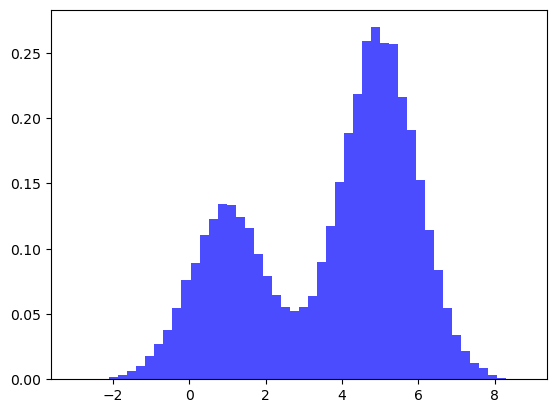

In [83]:
X = genfromtxt('hours_slept.csv', delimiter=',')
Y = genfromtxt('how_much_is_remembered.csv', delimiter=',')

plt.hist(X, 50, facecolor='blue', alpha=0.7, density=True)
plt.show()

In [6]:
# from scipy.stats import gaussian_kde

# kde_x = gaussian_kde(X)

# def p(x):
#     return kde_x(x)

# x = np.linspace(min(X), max(X), 1000)
# y = p(x)

# plt.hist(X, 40, facecolor='blue', alpha=0.7, density=True)
# plt.plot(x, y, color='red', linewidth=2)
# plt.show()

### 1)

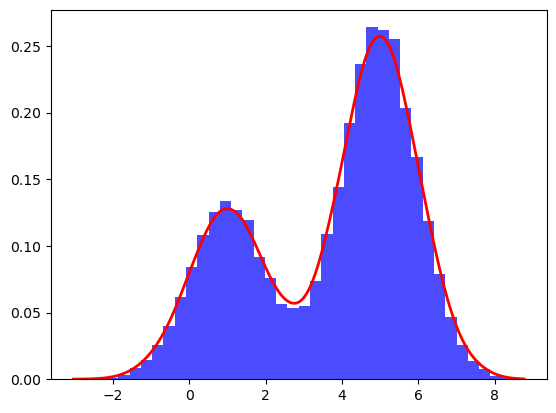

In [84]:
# Use KDE for the data
from scipy.stats import norm

sd = 0.3
def kde_x(x, X):
    x = np.atleast_1d(x)
    pdf = np.sum(norm.pdf(x[:, None], X, sd), axis=1)

    pdf = pdf/len(X)
    return pdf

def p(x):
    y = kde_x(x, X)
    return y

x = np.linspace(min(X), max(X), 1000)
y = p(x)

plt.hist(X, 40, facecolor='blue', alpha=0.7, density=True)
plt.plot(x, y, color='red', linewidth=2)
plt.show()


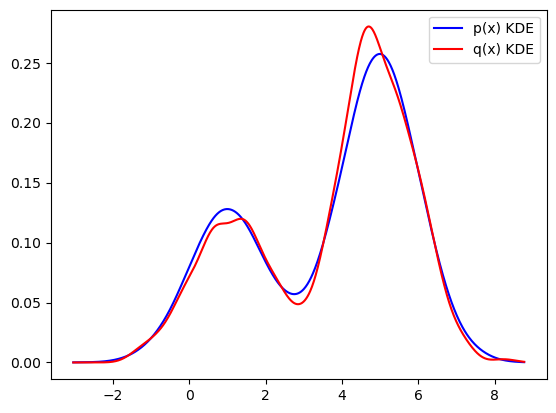

In [16]:
import matplotlib.pyplot as plt
samples_x = np.random.choice(X, 500, replace=False)
def q(x):
        return kde_x(x, samples_x)

x_range = np.linspace(min(X), max(X), 1000)
p_vals = p(x_range)
q_vals = q(x_range)

plt.plot(x_range, p_vals, label="p(x) KDE", color='blue')
plt.plot(x_range, q_vals, label="q(x) KDE", color='red')
plt.legend()
plt.show()

### 2)

In [86]:
def KL_divergence(x, p2): 
    p_1 = p(x) # np.log(np.maximum(p(x), 1e-10)) # p(x)
    p_2 = p2(x) # np.log(np.maximum(p2(x), 1e-10)) # p2(x)

    return p_1*np.log(p_1/p_2)

def KL_divergence_sample(x, q): 
    p_1 = np.log(np.maximum(p(x), 1e-10)) # p(x)
    p_2 = np.log(np.maximum(q(x), 1e-10)) 

    # p_2 = np.maximum(q(x), 0.00001)

    return np.mean(np.log(p_1/p_2))


dist_distance_list = []
samples_len_list = []
prev_kl = np.inf

samples_len = np.arange(50, 100000, 50)
for num_samples in samples_len:
    samples_indices = np.random.choice(X.shape[0], num_samples, replace=False)
    samples_x = X[samples_indices]

    # kde_samples = gaussian_kde(samples_x)
    def q(x):
        return kde_x(x, samples_x)
    
    # x_min, x_max = np.percentile(samples, [1, 99]) 
    integration_kl, error = quad(KL_divergence, min(samples_x), max(samples_x), args=(q,))

    sampling_kl = KL_divergence_sample(samples_x, q)
    print(f'{num_samples} Samples | Sample KL Divergence: {sampling_kl:.5f} | Integration KL Divergence: {integration_kl:.5f}')

    dist_distance_list.append(integration_kl)
    samples_len_list.append(num_samples)

    if abs(prev_kl - integration_kl) < 0.0005:
        training_samples_x = samples_x
        training_samples_y = Y[samples_indices]
        break
    else:
        prev_kl = integration_kl

50 Samples | Sample KL Divergence: 0.03515 | Integration KL Divergence: 0.01081
100 Samples | Sample KL Divergence: 0.03462 | Integration KL Divergence: 0.01170
150 Samples | Sample KL Divergence: 0.02971 | Integration KL Divergence: 0.02376
200 Samples | Sample KL Divergence: 0.02088 | Integration KL Divergence: 0.02077
250 Samples | Sample KL Divergence: 0.02046 | Integration KL Divergence: 0.01275
300 Samples | Sample KL Divergence: 0.00646 | Integration KL Divergence: 0.00535
350 Samples | Sample KL Divergence: 0.02004 | Integration KL Divergence: 0.00046
400 Samples | Sample KL Divergence: 0.02683 | Integration KL Divergence: 0.00929
450 Samples | Sample KL Divergence: 0.00010 | Integration KL Divergence: 0.00742
500 Samples | Sample KL Divergence: 0.00975 | Integration KL Divergence: 0.00505
550 Samples | Sample KL Divergence: 0.02392 | Integration KL Divergence: 0.00019
600 Samples | Sample KL Divergence: 0.00984 | Integration KL Divergence: 0.00814
650 Samples | Sample KL Diver

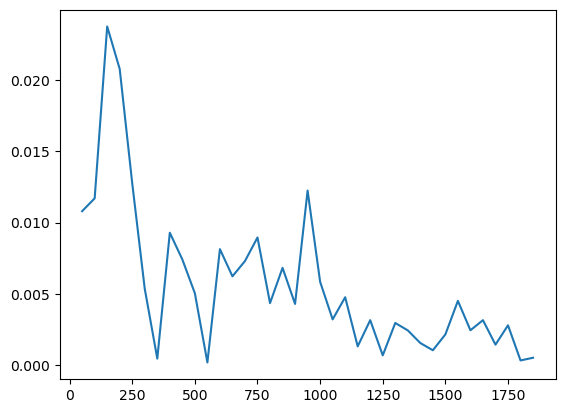

In [87]:
# Plot out decrease of KL Divergence
plt.plot(samples_len_list, dist_distance_list)
plt.show()

In [88]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def mse_func(phi, w, y):
    return np.mean((phi.dot(w) - y)**2)

# train regression on samples
training_samples_x = training_samples_x.reshape(-1, 1)
# reg = LinearRegression().fit(training_samples_x, training_samples_y)

# w = np.hstack((reg.coef_, reg.intercept_))  # get weights

# Find w
phi = np.hstack((training_samples_x, np.ones((len(training_samples_x), 1))))
w = np.linalg.inv(phi.T @ phi) @ phi.T @ training_samples_y

X = X.reshape(-1, 1)
phi_X = np.hstack((X, np.ones((len(X), 1))))

mse = mse_func(phi_X, w, Y)
print(f'MSE using sample set {mse}')
print(f'N Sub: {len(training_samples_x)}')
print(f'Percentage of Total: {len(training_samples_x)/len(X)}')

MSE using sample set 0.007491725164276625
N Sub: 1850
Percentage of Total: 0.0185
